# The Spark Foundation #GRIPOCT21

# TASK 2 - Prediction using Unsupervised ML

## Objective:

- From the given 'IRIS' dataset, predict the optimum number of clusters and represent it visually.

### Author: Sachin Pathania

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df = sns.load_dataset('Iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape #total 150 rows and 5 columns in the dataset

(150, 5)

In [4]:
df=df.iloc[:,0:4]
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


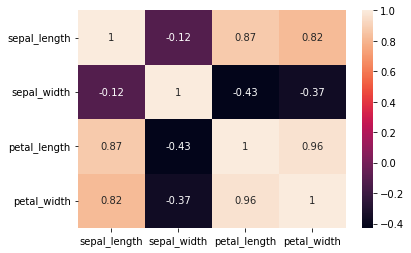

In [5]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### finiding the optimal number of clusters

In [6]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [7]:
cluster_error=[]
cluster_num=np.arange(1,11)
for i in cluster_num:
    cluster=KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    cluster.fit(x)
    cluster_error.append(cluster.inertia_)

In [8]:
cluster_df=pd.DataFrame({"Cluster":cluster_num,"Inertia":cluster_error})

In [9]:
cluster_df

,Cluster,Inertia
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.256009
4,5,46.446182
5,6,39.039987
6,7,34.299712
7,8,30.014398
8,9,28.036906
9,10,26.534529


### Elbow method

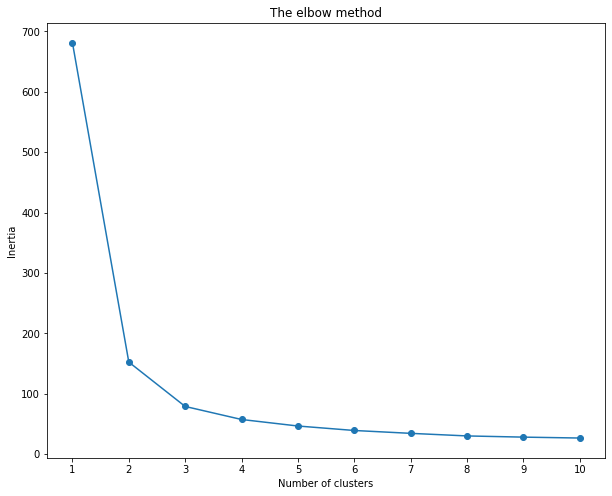

In [10]:
plt.figure(figsize=(10,8))
plt.plot(cluster_num,cluster_error,marker="o")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_num)
plt.show()

### applying KMeans with 3 clusters

In [11]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [12]:
y_kmeans 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

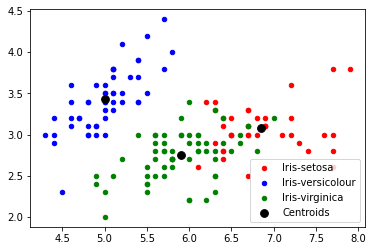

In [13]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 20, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 60, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

- Successfully predicted the optimum number of clusters to be 3 and represented it visually.

# END